In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


DIR_lauramurphy12 = os.path.abspath(os.path.dirname(os.getcwd()))
DIR_pythonScripts = os.path.join(DIR_lauramurphy12, "python")
DIR_jup = os.path.join(DIR_lauramurphy12, "jupyter")
DIR_dev = os.path.dirname(DIR_lauramurphy12)
DIR_Presc = os.path.dirname(DIR_dev)
DIR_datasets = os.path.join(DIR_Presc, "datasets")
DIR_datasets

'C:\\Users\\lmurphy4\\.conda\\envs\\myEnv\\proj\\L_PRESC\\PRESC\\datasets'

In [2]:
sys.path.insert(1, DIR_pythonScripts)
import wineClassification

# Import the Dataset

In [3]:
wineQuality = wineClassification.read_csv()
wineQuality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,False
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,False
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,False
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,True


# Exploratory Data Analysis and Data Pre-processing

In [4]:
wineClassification.is_null_values(wineQuality)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
recommend               0
dtype: int64

### Eliminate the feature 'quality' from the dataset. This is because we are creating models to predict wine recommendations (binary classification), and recommend is a direct function of wine quality.

In [5]:
wineQuality = wineClassification.drop_quality_column(wineQuality, "quality")
wineQuality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,False
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,False
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,False
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,True


### Extract Wine Recommendation Features from the dataset into separate dataframe

In [6]:
recommend_features = wineClassification.extract_features(wineQuality)
recommend_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


### Encode Target Labels with 0(False) and 1(True)

In [7]:
recommend_labels = wineClassification.label_encoding(wineQuality["recommend"])
recommend_labels

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### Imbalanced Classification: The distribution of classes (True/False) in our Recommend target variable is scewed more towards negative ratings (~78% of the dataset). 

In [8]:
wineClassification.class_distribution(wineQuality)

recommend
False    3838
True     1060
dtype: int64


## Univariate Plots: Data Distribution Across Wine Quality features

### Features generally have a Gaussian distribution, with most features seeming to skew towards the left, such as free sulfur dioixde, chlorides, residual sugar, and density. pH is more normally distributed between 2.8 and 3.6

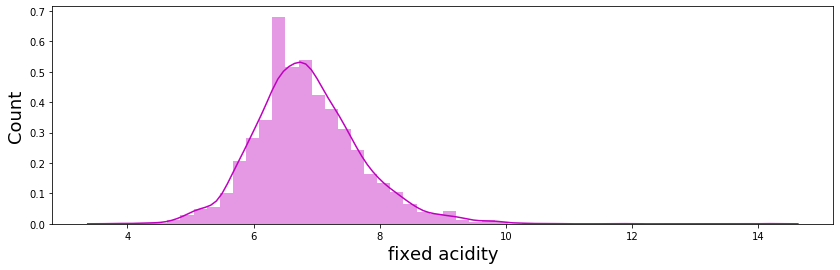

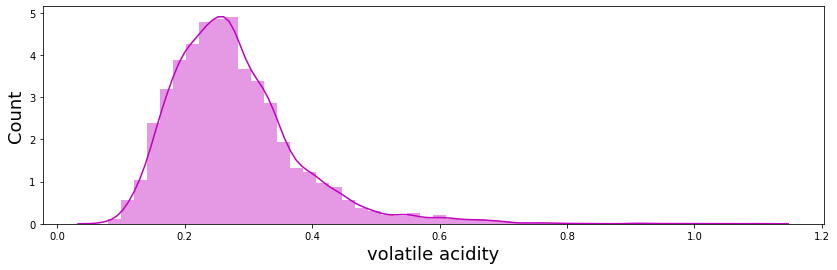

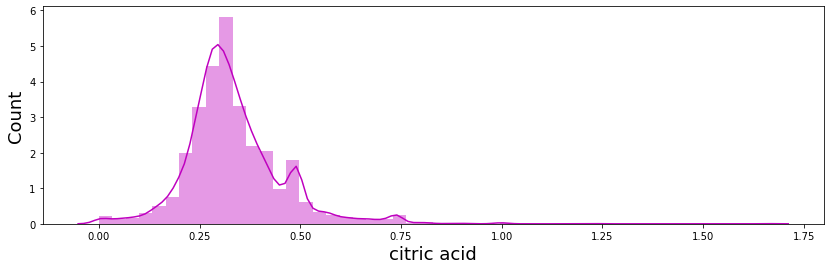

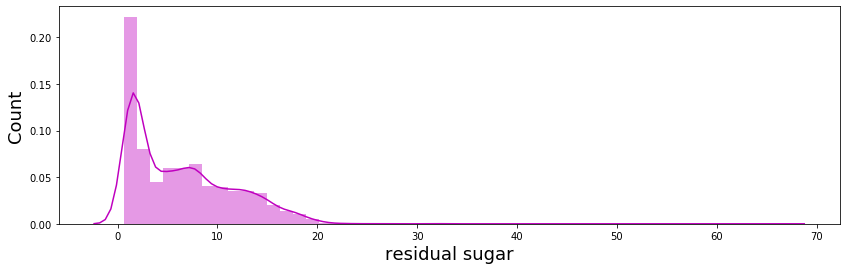

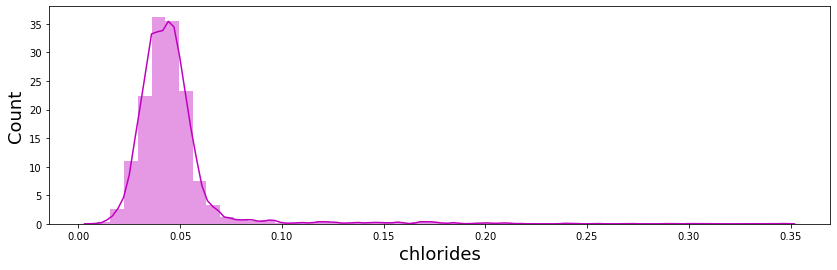

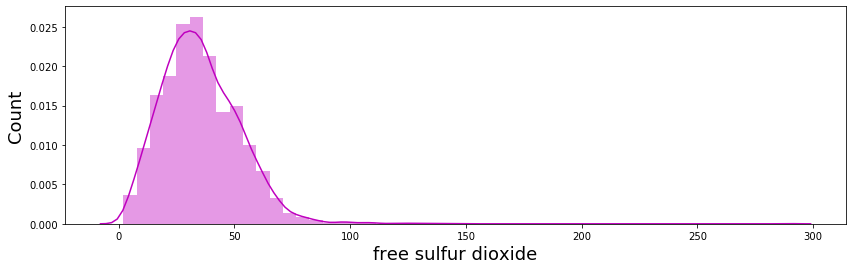

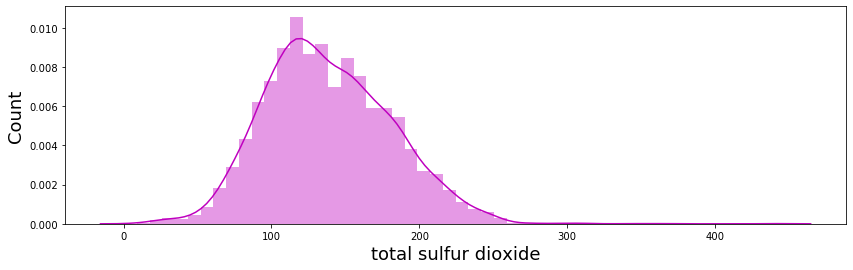

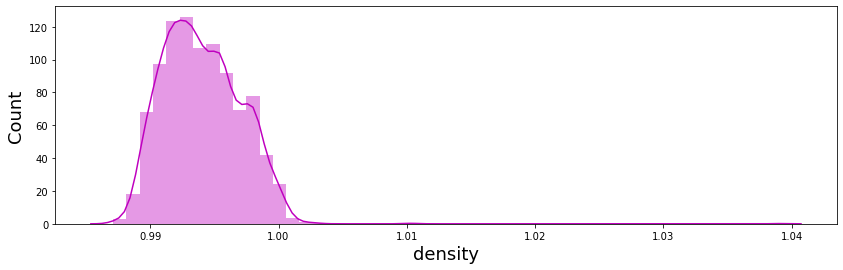

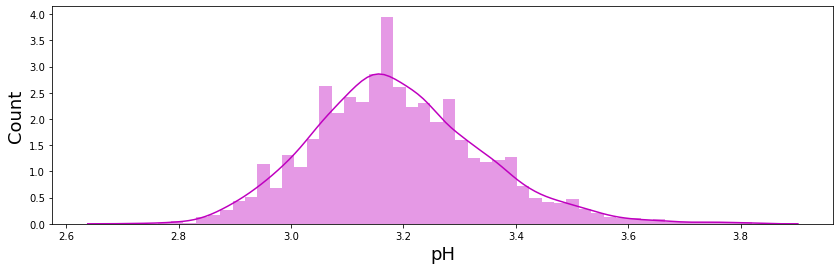

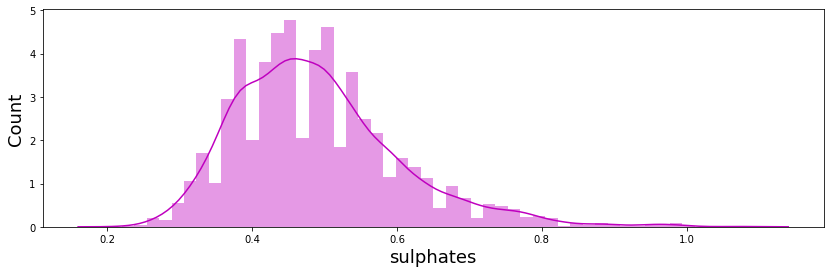

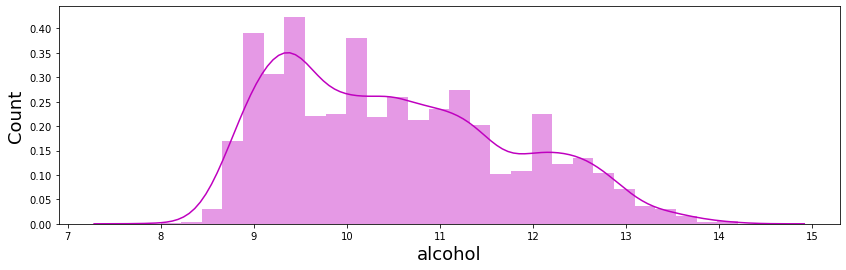

In [9]:
wineClassification.data_distribution(recommend_features)

## Bivariate Plotting: Explore Relationships Among Features

### Correlation Matrix of Wine Quality Features

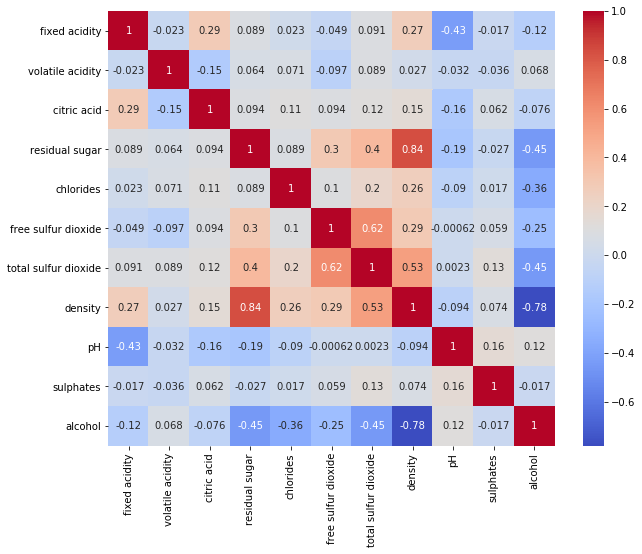

In [10]:
wineClassification.feature_correlations(recommend_features)

### There appears to be moderate positive correlations between total sulfur dioxide and free sulfur dioxide, and density and total sulfur dioxide. There is also a strong negative correlation between density and alcohol. 

### Density & Residual Sugar

#### The greater the sugar content, seems the more dense the liquid.

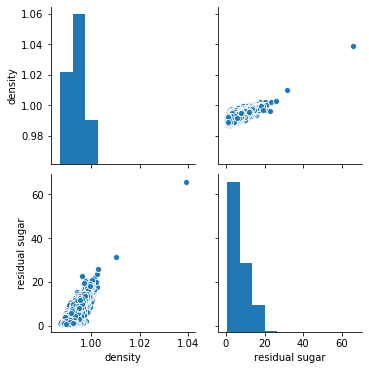

In [11]:
wineClassification.bivar_plot(wineQuality, 'density', 'residual sugar')

### Density & Alcohol

#### Appears the less alcohol content there is, the greater density the liquid has.

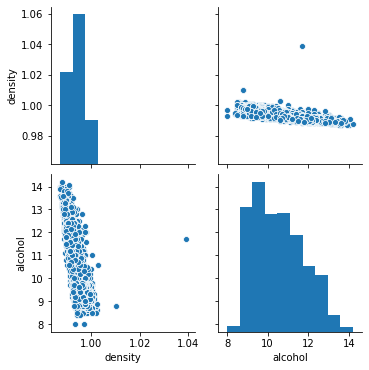

In [12]:
wineClassification.bivar_plot(wineQuality, 'density', 'alcohol')

In [13]:
## 

### Total Sulfur Dioxide & Free Sulfur Dioxide

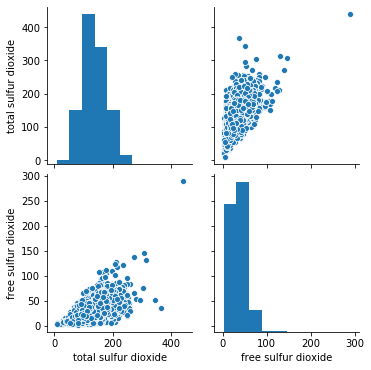

In [14]:
wineClassification.bivar_plot(wineQuality, 'total sulfur dioxide', 'free sulfur dioxide')

## Feature Scaling

### The data appears to generally have a Gaussian distribution around each feature, so Standard Scaler is used

In [15]:
recommend_features = wineClassification.feature_scaling(recommend_features)
recommend_features

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

## Train Test Split

### Using an 80/20 split as a starting point. Would like to explore utilizing other split ratios as well

In [16]:
X_train, X_test, y_train, y_test=train_test_split(recommend_features, recommend_labels, test_size=0.2, random_state=42)

# Generate Models

In [17]:
ml_models = []
wineClassification.create_ml_models(ml_models)
ml_models

[('k Nearest Neighbors',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('Decision Tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best'))]

### For each model, we split the wine features and the target variable recommend into k-folds. In this case, we use a Stratified K-Fold method to ensure each class is represented proportionally for each fold, since our classes are imbalanced. Below, the average of the cross validation scores is reported for a range of number of folds(2 to 10). Here, kNN is estimated to have the highest accuracy at 83.0% for 10 folds, and Decision Trees are estimated to have the highest accuracy at 83.1% for 7 folds. 

In [18]:
wineClassification.traversal_space_cross_val(ml_models, X_train, y_train)

Estimated Accuracy for 2 number of folds
k Nearest Neighbors 81.29
Decision Tree 79.96

Estimated Accuracy for 3 number of folds
k Nearest Neighbors 82.49
Decision Tree 81.7

Estimated Accuracy for 4 number of folds
k Nearest Neighbors 83.13
Decision Tree 80.52

Estimated Accuracy for 5 number of folds
k Nearest Neighbors 83.23
Decision Tree 80.83

Estimated Accuracy for 6 number of folds
k Nearest Neighbors 82.87
Decision Tree 81.14

Estimated Accuracy for 7 number of folds
k Nearest Neighbors 83.0
Decision Tree 82.31

Estimated Accuracy for 8 number of folds
k Nearest Neighbors 83.26
Decision Tree 82.59

Estimated Accuracy for 9 number of folds
k Nearest Neighbors 82.87
Decision Tree 81.8

Estimated Accuracy for 10 number of folds
k Nearest Neighbors 82.77
Decision Tree 82.24



# Hyperparameter Tuning Using Grid Search

## The default parameters were used in the classifiers above. However, we can improve model accuracy by tuning the hyperparameters. To do this, we create a grid of parameters to test on the model, and use GridSearchCV to determine the best performing model based on the set of parameters we put in the grid.

### Hyperparameter tuning with K-Nearest Neighbors

In [19]:
wineClassification.grid_search_knn(X_train, y_train)

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                      weights='uniform'),
 0.85)

### Hyperparameter tuning with Decision Trees

In [20]:
wineClassification.grid_search_dt(X_train, y_train)

(DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best'),
 0.82)

# Model Predictions

## For each model(kNN, Decision Tree), we fit the model on the training set with the specific hyperparmeters determined in the previous section, and made predictions on the test set. 

In [21]:
wineClassification.knn_eval_model_predictions(X_train, y_train, X_test, y_test)    

Accuracy of kNN: 0.86


Confusion Matrix for kNN
[[682  71]
 [ 65 162]]


Classification Report for kNN
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       753
           1       0.70      0.71      0.70       227

    accuracy                           0.86       980
   macro avg       0.80      0.81      0.81       980
weighted avg       0.86      0.86      0.86       980



In [22]:
wineClassification.dc_eval_model_predictions(X_train, y_train, X_test, y_test) 

Accuracy of Decision Tree: 0.82
Confusion Matrix for Decision Tree
[[650 103]
 [ 74 153]]
Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       753
           1       0.60      0.67      0.63       227

    accuracy                           0.82       980
   macro avg       0.75      0.77      0.76       980
weighted avg       0.83      0.82      0.82       980



### Overall, it appears that kNN was better able to predict the negative class predictions(sensitivity) as well as better able to predict the positive class predictions(specificity) than the Decision tree. 